In [13]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import matplotlib.pyplot as plt
import requests
import time
from collections import Counter
import seaborn as sns



In [14]:
import functions

# Data

In [15]:
metadata = pd.read_csv("./../data/metadata_books_with_tokens_counts_genre_language.tsv", sep="\t", index_col=0)

In [16]:
metadata

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,bert_multilingual_cased_count_parts_tokens_median/characters_count_median,bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median,codebook,title_English,genre,genre-multilabel,wikid,division,original_language,translation_period
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.140496,0.629630,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),...,0.144000,0.642857,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...,...,0.641667,5.133333,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...,...,0.225352,1.066667,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...,...,0.313725,1.777778,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,113,./../data/bibles/transformed_xml_with_year\SF_...,VIE,Vietnamese Version,0,31102,1189,66,zefania,SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION),...,0.051095,0.200000,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11277,199,./../data/bibles/transformed_xml_with_year\SF_...,WIU,The New Testament,0,7817,260,27,zefania,SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT),...,0.172897,1.000000,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11278,123,./../data/bibles/transformed_xml_with_year\SF_...,XKL,Klingon Version,0,31083,1189,66,zefania,SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION),...,0.143678,0.423729,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11279,200,./../data/bibles/transformed_xml_with_year\SF_...,YBY,The New Testament,0,7482,241,27,zefania,SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT),...,0.188596,1.162162,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN


In [17]:
metadata["genre"].unique().tolist()

['historical',
 'law',
 'wisdom',
 'lyric',
 'apocalyptic',
 'prophecy',
 'gospel',
 'letter']

In [18]:
metadata.loc[metadata["genre"].isin(["historical", "gospel", "letter","law"]), "group_genres"] = "narrative-essayistic"

In [19]:
metadata.loc[metadata["genre"].isin(["wisdom", "lyric", "prophecy", "apocalyptic"]), "group_genres"] = "other"

In [8]:
#metadata["group_genres"].fillna("other", inplace=True)

In [21]:
metadata["group_genres"].isna().sum()

0

# Unknown Tokens

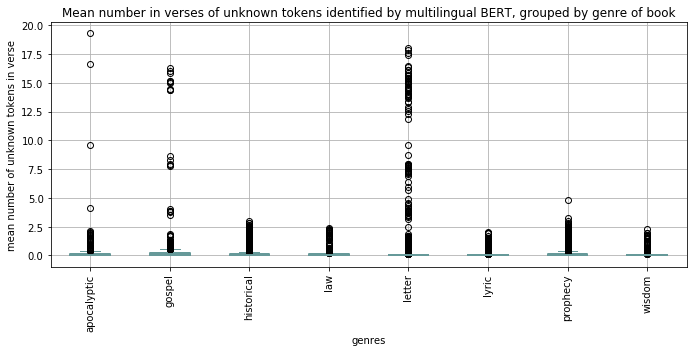

In [23]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "genre", rot = 90, xlabel = "genres", ylabel = "mean number of unknown tokens in verse", title = "Mean number in verses of unknown tokens identified by multilingual BERT, grouped by genre of book", figure_name = "unknown_tokens_genres", figsize = (10,5))

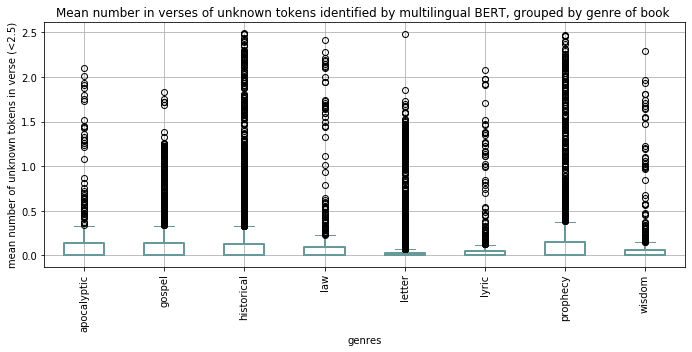

In [24]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_unks_mean"]<2.5], "bert_multilingual_cased_count_unks_mean", "genre", rot = 90, xlabel = "genres", ylabel = "mean number of unknown tokens in verse (<2.5)", title = "Mean number in verses of unknown tokens identified by multilingual BERT, grouped by genre of book ", figure_name = "unknown_tokens_genres_25", figsize = (10,5))

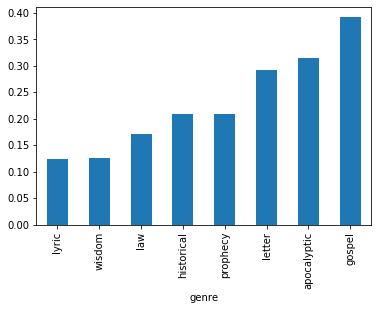

In [25]:
metadata.groupby("genre")["bert_multilingual_cased_count_unks_mean"].mean().sort_values().plot.bar()

In [26]:
metadata.groupby("group_genres")["bert_multilingual_cased_count_unks_mean"].mean().sort_values()

group_genres
other                   0.197213
narrative-essayistic    0.273702
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

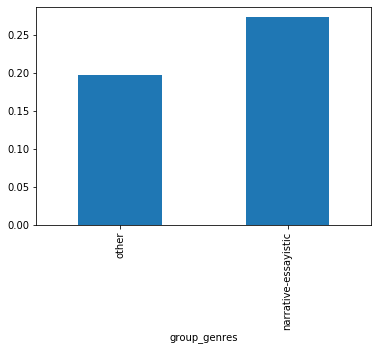

In [27]:
metadata.groupby("group_genres")["bert_multilingual_cased_count_unks_mean"].mean().sort_values().plot.bar()

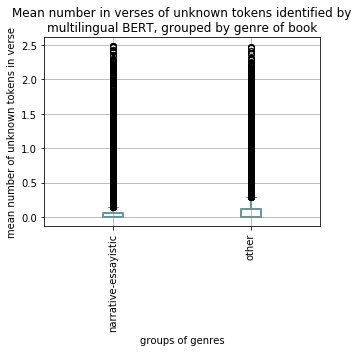

In [28]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_unks_mean"]<2.5], "bert_multilingual_cased_count_unks_mean", "group_genres", rot = 90, xlabel = "groups of genres", ylabel = "mean number of unknown tokens in verse", title = "Mean number in verses of unknown tokens identified by\nmultilingual BERT, grouped by genre of book", figure_name = "unknown_tokens_group_genres", figsize = (5,5))

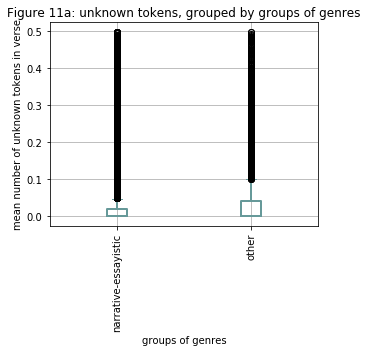

In [36]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_unks_mean"]<0.5], "bert_multilingual_cased_count_unks_mean",
"group_genres", rot = 90, xlabel = "groups of genres", ylabel = "mean number of unknown tokens in verse",
title = "Figure 11a: unknown tokens, grouped by groups of genres",
figure_name = "figure11a_unknown_tokens_group_genres", figsize = (5,5))

In [34]:
results_genres_unks_df = functions.test_differences_columns(metadata, "group_genres", "bert_multilingual_cased_count_unks_mean")

In [31]:
results_genres_unks_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,median_value_1,median_value_2,significance
0,narrative-essayistic,other,0.000043,4.093546,0.273702,0.197213,0.0,0.0,***


In [32]:

results_genres_unks_df = functions.test_differences_columns(metadata.loc[metadata["bert_multilingual_cased_count_unks_mean"]<0.5], "group_genres", "bert_multilingual_cased_count_unks_mean")

In [21]:
results_genres_unks_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,biblical,narrative,0.000001,4.885545,0.050267,0.03941,***
1,biblical,other,0.375127,0.887624,0.050267,0.04573,
2,narrative,other,0.196090,-1.294634,0.039410,0.04573,


In [22]:
metadata

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,codebook,title_English,genre,genre-multilabel,wikid,division,original_language,translation_period,in_Latin_script?,group_genres
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,True,narrative
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,True,narrative
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,narrative
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,narrative
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,narrative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,113,./../data/bibles/transformed_xml_with_year\SF_...,VIE,Vietnamese Version,0,31102,1189,66,zefania,SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,biblical
11277,199,./../data/bibles/transformed_xml_with_year\SF_...,WIU,The New Testament,0,7817,260,27,zefania,SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,biblical
11278,123,./../data/bibles/transformed_xml_with_year\SF_...,XKL,Klingon Version,0,31083,1189,66,zefania,SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,biblical
11279,200,./../data/bibles/transformed_xml_with_year\SF_...,YBY,The New Testament,0,7482,241,27,zefania,SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,biblical


# Part Tokens

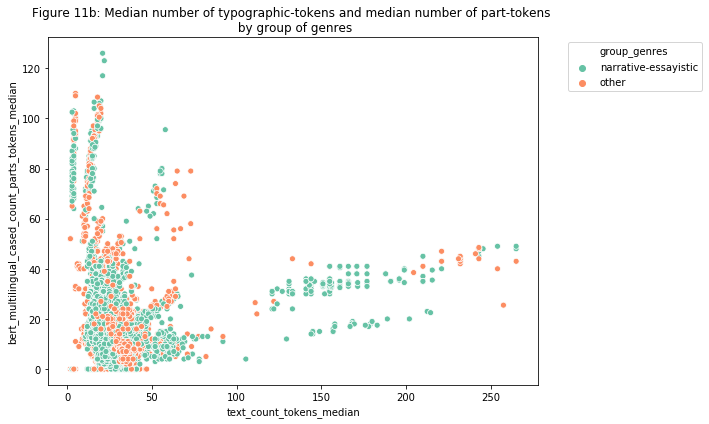

In [62]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["text_count_tokens_median"] < 300)],
        column_x = "text_count_tokens_median", column_y = "bert_multilingual_cased_count_parts_tokens_median", palette= "Set2",
        column_color = "group_genres",  title = "Figure 11b: Median number of typographic-tokens and median number of part-tokens \n by group of genres",
        outdir = "./../visualizations/", figure_name = "figure11b_tokens_bert_tokens_main_genre")

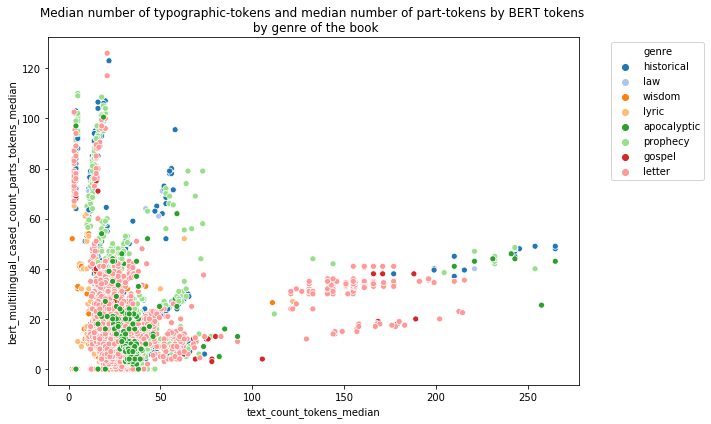

In [46]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["text_count_tokens_median"] < 300)],
        column_x = "text_count_tokens_median", column_y = "bert_multilingual_cased_count_parts_tokens_median", palette= "tab20",
        column_color = "genre",  title = "Median number of typographic-tokens and median number of part-tokens by BERT tokens \n by genre of the book", outdir = "./../visualizations/", figure_name = "tokens_bert_tokens_genre")

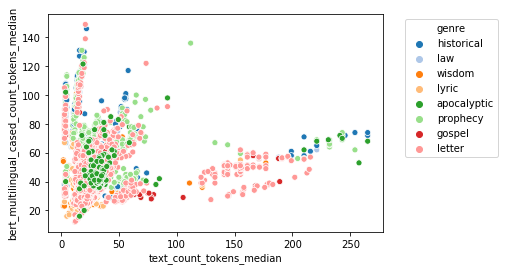

In [47]:
sns.scatterplot(x ="text_count_tokens_median", y = "bert_multilingual_cased_count_tokens_median",
hue = "genre", data = metadata.loc[(metadata["text_count_tokens_median"] < 300)],
palette = "tab20", alpha = 1
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


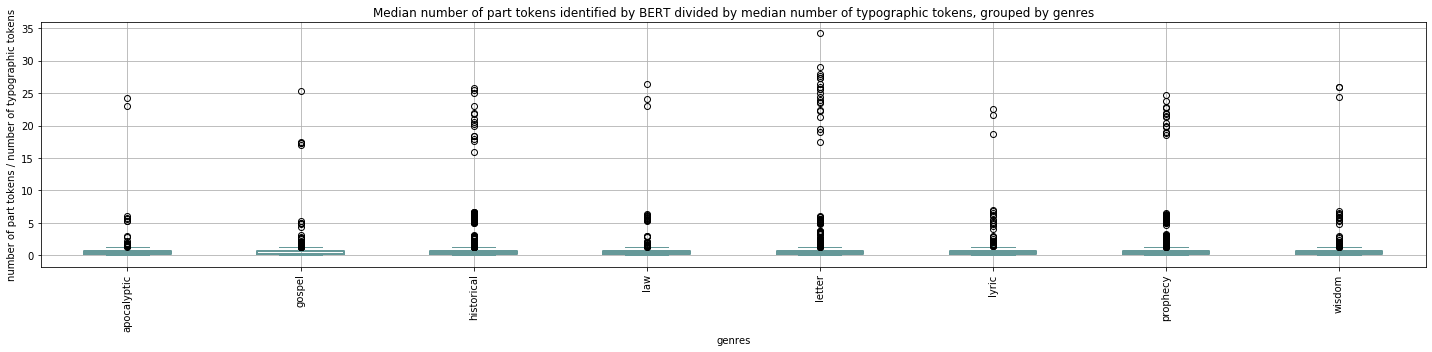

In [48]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "genre", rot = 90, xlabel = "genres", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median number of typographic tokens, grouped by genres", figure_name = "part_tokens_typographic_tokens_genres")

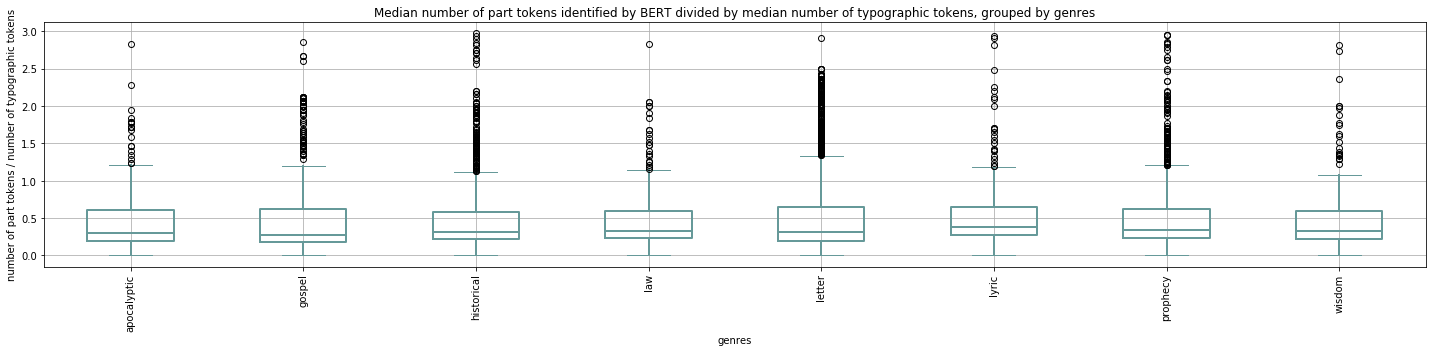

In [49]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 3], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "genre", rot = 90, xlabel = "genres", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median number of typographic tokens, grouped by genres", figure_name = "part_tokens_typographic_tokens_genres")

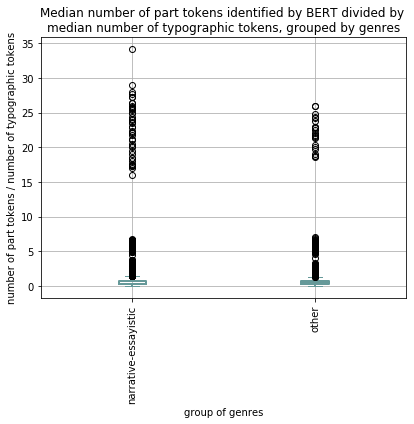

In [57]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median",
"group_genres", rot = 90, xlabel = "group of genres", ylabel = "number of part tokens / number of typographic tokens",
title = "Median number of part tokens identified by BERT divided by \nmedian number of typographic tokens, grouped by genres",
figure_name = "part_tokens_typographic_tokens_group_genres", figsize=(6,6))

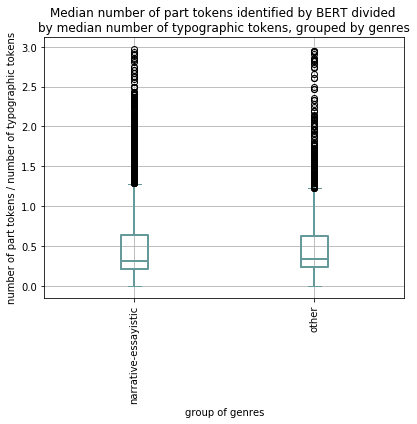

In [59]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 3],
"bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "group_genres", rot = 90, xlabel = "group of genres",
ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided \nby median number of typographic tokens, grouped by genres",
figure_name = "part_tokens_typographic_tokens_group_genres", figsize=(6,6))

In [52]:

results_genres_parts_df = functions.test_differences_columns(metadata, "genre", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")

In [53]:
results_genres_parts_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,median_value_1,median_value_2,significance
0,apocalyptic,gospel,0.393120,0.854727,0.664808,0.569797,0.304348,0.280000,
1,apocalyptic,historical,0.524815,-0.636420,0.664808,0.734523,0.304348,0.312500,
2,apocalyptic,law,0.482198,-0.703106,0.664808,0.765524,0.304348,0.333333,
3,apocalyptic,letter,0.880457,0.150485,0.664808,0.648920,0.304348,0.318182,
4,apocalyptic,lyric,0.374509,-0.888591,0.664808,0.784697,0.304348,0.384615,
5,apocalyptic,prophecy,0.395381,-0.850670,0.664808,0.758485,0.304348,0.352941,
6,apocalyptic,wisdom,0.448854,-0.757703,0.664808,0.776113,0.304348,0.333333,
7,gospel,historical,0.006527,-2.722270,0.569797,0.734523,0.280000,0.312500,**
8,gospel,law,0.076637,-1.773399,0.569797,0.765524,0.280000,0.333333,
9,gospel,letter,0.135585,-1.493068,0.569797,0.648920,0.280000,0.318182,


In [54]:

results_group_genres_parts_df = functions.test_differences_columns(metadata, "group_genres", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")

In [55]:
results_group_genres_parts_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,median_value_1,median_value_2,significance
0,narrative-essayistic,other,0.032902,-2.133779,0.66982,0.754651,0.3125,0.351351,*


In [36]:
metadata.shape

(11281, 81)

# Old Things

In [37]:
books = pd.read_excel("./../data/books.xlsx", index_col=0)

In [38]:
books

,bible,id,title_Spanish,testament,encoded,title_English,codebook,Unnamed: 8,chaptersc,genre,...,latitude,longitude,alternative_id,wikid,sexual_annotation,division,author,language,period_produced,period_setting
0,bible,1,Génesis,old,1,Genesis,GEN,NaN,50,historical,...,32.615687,36.793083,Gen,Q9184,1.0,Pentateuch,NaN,hebrew,NaN,NaN
1,bible,2,Éxodo,old,1,Exodus,EXO,NaN,40,historical,...,30.469969,33.843280,Exod,Q9190,NaN,Pentateuch,NaN,hebrew,NaN,NaN
2,bible,3,Levítico,old,1,Leviticus,LEV,NaN,27,law,...,30.521765,34.112561,Lev,Q41490,NaN,Pentateuch,NaN,hebrew,NaN,NaN
3,bible,4,Números,old,1,Numbers,NUM,NaN,36,law,...,31.221618,34.841433,Num,Q43099,NaN,Pentateuch,NaN,hebrew,NaN,NaN
4,bible,5,Deuteronomio,old,1,Deuteronomy,DEU,NaN,34,law,...,31.506106,35.735247,Deut,Q42614,NaN,Pentateuch,NaN,hebrew,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,bible,62,1 Juan,new,1,1 John,1JO,NaN,5,letter,...,NaN,NaN,1John,Q131101,NaN,Letters,NaN,greek,NaN,NaN
62,bible,63,2 Juan,new,1,2 John,2JO,NaN,1,letter,...,NaN,NaN,2John,Q131453,NaN,Letters,NaN,greek,NaN,NaN
63,bible,64,3 Juan,new,1,3 John,3JO,NaN,1,letter,...,NaN,NaN,3John,Q131462,NaN,Letters,NaN,greek,NaN,NaN
64,bible,65,Judas,new,1,Jude,JUD,NaN,1,letter,...,26.820553,30.802498,Jude,Q131466,NaN,Letters,NaN,greek,NaN,NaN


In [39]:
columns = ["bert_cased", "bert_multilingual_cased"]

In [40]:
languages_lt = ["ENG", "GER", "GRE", "LAT", "FRE", "SPA", "ITA", "RUS", "GRC"]


In [41]:
metadata = pd.read_csv("./../data/metadata_books_with_tokens_counts.tsv", sep="\t", index_col=0)

In [42]:
metadata.columns.tolist()

['index',
 'path',
 'language',
 'title',
 'year',
 'number_verses_translation',
 'number_chapters_translation',
 'number_books_translation',
 'source',
 'file_name_translation',
 'book',
 'book_file_name',
 'text_first_verse',
 'id_first_verse',
 'text_count_tokens_mean',
 'text_count_tokens_median',
 'text_count_tokens_std',
 'characters_count_mean',
 'characters_count_median',
 'characters_count_std',
 'bert_cased_count_tokens_mean',
 'bert_cased_count_tokens_median',
 'bert_cased_count_tokens_std',
 'bert_cased_count_parts_tokens_mean',
 'bert_cased_count_parts_tokens_median',
 'bert_cased_count_parts_tokens_std',
 'bert_cased_count_unks_mean',
 'bert_cased_count_unks_median',
 'bert_cased_count_unks_std',
 'bert_multilingual_cased_count_tokens_mean',
 'bert_multilingual_cased_count_tokens_median',
 'bert_multilingual_cased_count_tokens_std',
 'bert_multilingual_cased_count_parts_tokens_mean',
 'bert_multilingual_cased_count_parts_tokens_median',
 'bert_multilingual_cased_count_par

In [43]:
metadata = pd.merge(metadata, books, left_on=  "book", right_on="codebook")



In [44]:
metadata.columns.tolist()[-20:]

['id',
 'title_Spanish',
 'testament',
 'encoded',
 'title_English',
 'codebook',
 'Unnamed: 8',
 'chaptersc',
 'genre',
 'genre-multilabel',
 'latitude',
 'longitude',
 'alternative_id',
 'wikid',
 'sexual_annotation',
 'division',
 'author',
 'language_y',
 'period_produced',
 'period_setting']

In [45]:
from pylab import *

cmap = cm.get_cmap('tab20', 20)    # PiYG

colors = []
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    colors.append(matplotlib.colors.rgb2hex(rgba))

from pylab import *

def get_colors_lt(cmap_name = "tab20"):

    cmap = cm.get_cmap(cmap_name, 20)    # PiYG

    colors = []
    for i in range(cmap.N):
        rgba = cmap(i)
        # rgb2hex accepts rgb or rgba
        colors.append(matplotlib.colors.rgb2hex(rgba))

    return colors
        
def add_color_column_based_on_str_column(df, colors = colors, column_name = "main writing system"):

    colors = colors[0:len(df[column_name].unique().tolist())]
    color_dict = dict(zip(df[column_name].unique().tolist(), colors))
    
    df[column_name + "_colors"]= [ color_dict[i] for i in df[column_name] ]

    return df, color_dict



In [46]:
colors = get_colors_lt(cmap_name = "tab20")

In [47]:
metadata.shape

(11281, 80)

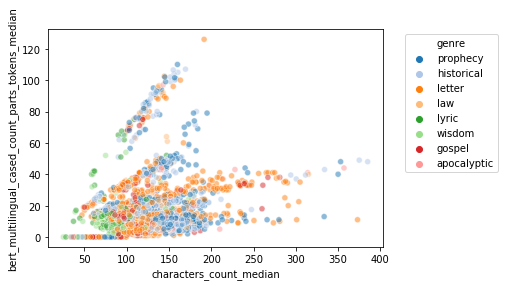

In [35]:
sns.scatterplot(x = "characters_count_median", y = "bert_multilingual_cased_count_parts_tokens_median",
hue = "genre", data = metadata.loc[(metadata["characters_count_median"] < 500)].sample(5000),
palette = "tab20", alpha = 0.5
)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


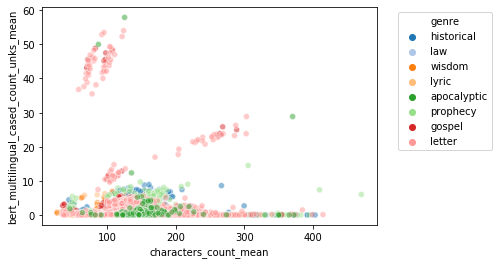

In [38]:
sns.scatterplot(x = "characters_count_mean", y = "bert_multilingual_cased_count_unks_mean",
hue = "genre", data = metadata.loc[(metadata["characters_count_mean"] < 500)],
palette = "tab20", alpha = 0.5
)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


In [22]:
metadata

,index,path,language_x,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,latitude,longitude,alternative_id,wikid,sexual_annotation,division,author,language_y,period_produced,period_setting
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,32.615687,36.793083,Gen,Q9184,1.0,Pentateuch,NaN,hebrew,NaN,NaN
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),...,32.615687,36.793083,Gen,Q9184,1.0,Pentateuch,NaN,hebrew,NaN,NaN
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...,...,32.615687,36.793083,Gen,Q9184,1.0,Pentateuch,NaN,hebrew,NaN,NaN
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...,...,32.615687,36.793083,Gen,Q9184,1.0,Pentateuch,NaN,hebrew,NaN,NaN
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...,...,32.615687,36.793083,Gen,Q9184,1.0,Pentateuch,NaN,hebrew,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,101,/versions/Reina-Valera-Revisada-RVR/#booklist,SPA,Reina Valera Revisada (RVR1977),1977,31103,1189,66,biblegateway,Reina Valera Revisada (RVR1977),...,34.707841,33.514733,Rev,Q42040,1.0,Revelation,NaN,greek,NaN,NaN
11277,102,/versions/Reina-Valera-1995-RVR1995-Biblia/#bo...,SPA,Reina-Valera 1995 (RVR1995),1995,31104,1189,66,biblegateway,Reina-Valera 1995 (RVR1995),...,34.707841,33.514733,Rev,Q42040,1.0,Revelation,NaN,greek,NaN,NaN
11278,103,/versions/Reina-Valera-Antigua-RVA-Biblia/#boo...,SPA,Reina-Valera Antigua (RVA),1569,31101,1189,66,biblegateway,Reina-Valera Antigua (RVA),...,34.707841,33.514733,Rev,Q42040,1.0,Revelation,NaN,greek,NaN,NaN
11279,104,/versions/Spanish-Blue-Red-Gold-Letter-Edition...,SPA,Spanish Blue Red and Gold Letter Edition (SRV-...,2014,31103,1189,66,biblegateway,Spanish Blue Red and Gold Letter Edition (SRV-...,...,34.707841,33.514733,Rev,Q42040,1.0,Revelation,NaN,greek,NaN,NaN


In [10]:
columns = [
    'text_count_tokens'
    ,'bert_cased_count_tokens',
 'bert_cased_count_parts_tokens',
 'bert_cased_count_unks',
 'bert_multilingual_cased_count_tokens',
 'bert_multilingual_cased_count_parts_tokens',
 'bert_multilingual_cased_count_unks',
 ]

In [11]:
genres = books["genre"].unique().tolist()


In [16]:
errors = []

i = 0

for index, row in metadata.iterrows():
    try:
        print(row["file_name_translation"])

        df = pd.read_csv("./../data/translations_tokenized/" + row["file_name_translation"] + ".tsv", sep="\t", index_col=0)

        df = pd.merge(df, books[["genre","codebook"]], on="codebook", )

        genre_df = df.groupby("genre")[['text_count_tokens',
                'bert_cased_count_tokens',
                'bert_cased_count_parts_tokens',
                'bert_cased_count_unks',
                'bert_multilingual_cased_count_tokens',
                'bert_multilingual_cased_count_parts_tokens',
                'bert_multilingual_cased_count_unks',]].mean()


        genre_df["language"] = row["language"]
        genre_df["year"] = row["year"]
        genre_df["file_name_translation"] = row["file_name_translation"]

        if i == 0:
            total_genre_df = genre_df
        else:
            total_genre_df = pd.concat([total_genre_df,genre_df])
    except:
        errors.append(row["file_name_translation"])
    
    i =+ 1
    


SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE TOSK)
SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE

In [11]:
total_genre_df

,text_count_tokens,bert_cased_count_tokens,bert_cased_count_parts_tokens,bert_cased_count_unks,bert_multilingual_cased_count_tokens,bert_multilingual_cased_count_parts_tokens,bert_multilingual_cased_count_unks,language,year,file_name
genre,,,,,,,,,,
letter,29.313869,127.437956,2.175182,0.072993,131.386861,3.423358,0.226277,ENG,0,SF_2004-04-25_ENG_MARCGAL_(THE EPISTLE TO THE ...
apocalyptic,22.628458,276.497365,44.859684,4.171278,206.067194,23.017787,0.488142,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH)
gospel,18.626800,242.617281,38.047352,6.446668,176.034904,18.597999,0.270930,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH)
historical,19.669131,259.534236,41.644563,5.391833,189.203822,20.392630,0.460874,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH)
law,18.116606,242.920939,39.991336,3.349097,177.990253,19.719134,0.263538,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH)
...,...,...,...,...,...,...,...,...,...,...
law,33.302529,251.870805,28.965977,0.164138,193.662989,9.465287,0.384828,SPA,2000,Traducción en lenguaje actual (TLA)
letter,31.311600,235.840788,27.243745,0.154284,178.214556,8.026914,0.172479,SPA,2000,Traducción en lenguaje actual (TLA)
lyric,21.004428,154.716989,17.921498,0.107085,120.327697,6.454106,0.116747,SPA,2000,Traducción en lenguaje actual (TLA)


In [12]:
total_genre_df["genre"] = total_genre_df.index

In [13]:
total_genre_df.drop("genre", axis="columns", inplace=True)

In [14]:
total_genre_df.reset_index(inplace=True)

In [15]:
total_genre_df

,genre,text_count_tokens,bert_cased_count_tokens,bert_cased_count_parts_tokens,bert_cased_count_unks,bert_multilingual_cased_count_tokens,bert_multilingual_cased_count_parts_tokens,bert_multilingual_cased_count_unks,language,year,file_name
0,letter,29.313869,127.437956,2.175182,0.072993,131.386861,3.423358,0.226277,ENG,0,SF_2004-04-25_ENG_MARCGAL_(THE EPISTLE TO THE ...
1,apocalyptic,22.628458,276.497365,44.859684,4.171278,206.067194,23.017787,0.488142,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH)
2,gospel,18.626800,242.617281,38.047352,6.446668,176.034904,18.597999,0.270930,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH)
3,historical,19.669131,259.534236,41.644563,5.391833,189.203822,20.392630,0.460874,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH)
4,law,18.116606,242.920939,39.991336,3.349097,177.990253,19.719134,0.263538,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH)
...,...,...,...,...,...,...,...,...,...,...,...
1622,law,33.302529,251.870805,28.965977,0.164138,193.662989,9.465287,0.384828,SPA,2000,Traducción en lenguaje actual (TLA)
1623,letter,31.311600,235.840788,27.243745,0.154284,178.214556,8.026914,0.172479,SPA,2000,Traducción en lenguaje actual (TLA)
1624,lyric,21.004428,154.716989,17.921498,0.107085,120.327697,6.454106,0.116747,SPA,2000,Traducción en lenguaje actual (TLA)
1625,prophecy,36.876704,273.202363,31.267798,0.187519,211.902454,10.468949,1.009997,SPA,2000,Traducción en lenguaje actual (TLA)


In [18]:
total_genre_df

,genre,text_count_tokens,bert_cased_count_tokens,bert_cased_count_parts_tokens,bert_cased_count_unks,bert_multilingual_cased_count_tokens,bert_multilingual_cased_count_parts_tokens,bert_multilingual_cased_count_unks,language,year,file_name
0,letter,29.313869,127.437956,2.175182,0.072993,131.386861,3.423358,0.226277,ENG,0,SF_2004-04-25_ENG_MARCGAL_(THE EPISTLE TO THE ...
1,apocalyptic,22.628458,276.497365,44.859684,4.171278,206.067194,23.017787,0.488142,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH)
2,gospel,18.626800,242.617281,38.047352,6.446668,176.034904,18.597999,0.270930,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH)
3,historical,19.669131,259.534236,41.644563,5.391833,189.203822,20.392630,0.460874,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH)
4,law,18.116606,242.920939,39.991336,3.349097,177.990253,19.719134,0.263538,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH)
...,...,...,...,...,...,...,...,...,...,...,...
1622,law,33.302529,251.870805,28.965977,0.164138,193.662989,9.465287,0.384828,SPA,2000,Traducción en lenguaje actual (TLA)
1623,letter,31.311600,235.840788,27.243745,0.154284,178.214556,8.026914,0.172479,SPA,2000,Traducción en lenguaje actual (TLA)
1624,lyric,21.004428,154.716989,17.921498,0.107085,120.327697,6.454106,0.116747,SPA,2000,Traducción en lenguaje actual (TLA)
1625,prophecy,36.876704,273.202363,31.267798,0.187519,211.902454,10.468949,1.009997,SPA,2000,Traducción en lenguaje actual (TLA)


In [20]:
total_genre_df["bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean"] = total_genre_df["bert_multilingual_cased_count_tokens"] / total_genre_df["text_count_tokens"] 

In [27]:
total_genre_df["bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean"] = total_genre_df["bert_multilingual_cased_count_parts_tokens"] / total_genre_df["text_count_tokens"] 

In [28]:
total_genre_df["bert_multilingual_cased_count_unks_mean/text_count_tokens_mean"] = total_genre_df["bert_multilingual_cased_count_unks"] / total_genre_df["text_count_tokens"] 

In [29]:
total_genre_df.to_csv("./../data/metadata_genres_with_tokens_counts.tsv", sep="\t")


In [30]:
total_genre_df = pd.read_csv("./../data/metadata_genres_with_tokens_counts.tsv", sep="\t", index_col=0)

In [54]:
total_genre_df.loc[total_genre_df["genre"].isin(['historical', 'gospel', 'letter']), "group_genres"] = "modern genres"



In [55]:
total_genre_df.loc[total_genre_df["genre"].isin(['wisdom', 'lyric', 'apocalyptic', 'prophecy',]), "group_genres"] = "biblical genres"



In [56]:
total_genre_df

,genre,text_count_tokens,bert_cased_count_tokens,bert_cased_count_parts_tokens,bert_cased_count_unks,bert_multilingual_cased_count_tokens,bert_multilingual_cased_count_parts_tokens,bert_multilingual_cased_count_unks,language,year,file_name,bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_unks_mean/text_count_tokens_mean,bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean,group_genres
0,letter,29.313869,127.437956,2.175182,0.072993,131.386861,3.423358,0.226277,ENG,0,SF_2004-04-25_ENG_MARCGAL_(THE EPISTLE TO THE ...,4.482072,0.007719,0.116783,modern genres
1,apocalyptic,22.628458,276.497365,44.859684,4.171278,206.067194,23.017787,0.488142,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH),9.106550,0.021572,1.017205,biblical genres
2,gospel,18.626800,242.617281,38.047352,6.446668,176.034904,18.597999,0.270930,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH),9.450625,0.014545,0.998454,modern genres
3,historical,19.669131,259.534236,41.644563,5.391833,189.203822,20.392630,0.460874,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH),9.619328,0.023431,1.036783,modern genres
4,law,18.116606,242.920939,39.991336,3.349097,177.990253,19.719134,0.263538,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH),9.824702,0.014547,1.088456,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,law,33.302529,251.870805,28.965977,0.164138,193.662989,9.465287,0.384828,SPA,2000,Traducción en lenguaje actual (TLA),5.815264,0.011556,0.284221,NaN
1623,letter,31.311600,235.840788,27.243745,0.154284,178.214556,8.026914,0.172479,SPA,2000,Traducción en lenguaje actual (TLA),5.691646,0.005508,0.256356,modern genres
1624,lyric,21.004428,154.716989,17.921498,0.107085,120.327697,6.454106,0.116747,SPA,2000,Traducción en lenguaje actual (TLA),5.728682,0.005558,0.307274,biblical genres
1625,prophecy,36.876704,273.202363,31.267798,0.187519,211.902454,10.468949,1.009997,SPA,2000,Traducción en lenguaje actual (TLA),5.746242,0.027388,0.283891,biblical genres


In [53]:
genres

['historical',
 'law',
 'wisdom',
 'lyric',
 'apocalyptic',
 'prophecy',
 'gospel',
 'letter']

In [31]:
total_genre_df

,genre,text_count_tokens,bert_cased_count_tokens,bert_cased_count_parts_tokens,bert_cased_count_unks,bert_multilingual_cased_count_tokens,bert_multilingual_cased_count_parts_tokens,bert_multilingual_cased_count_unks,language,year,file_name,bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_unks_mean/text_count_tokens_mean,bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean
0,letter,29.313869,127.437956,2.175182,0.072993,131.386861,3.423358,0.226277,ENG,0,SF_2004-04-25_ENG_MARCGAL_(THE EPISTLE TO THE ...,4.482072,0.007719,0.116783
1,apocalyptic,22.628458,276.497365,44.859684,4.171278,206.067194,23.017787,0.488142,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH),9.106550,0.021572,1.017205
2,gospel,18.626800,242.617281,38.047352,6.446668,176.034904,18.597999,0.270930,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH),9.450625,0.014545,0.998454
3,historical,19.669131,259.534236,41.644563,5.391833,189.203822,20.392630,0.460874,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH),9.619328,0.023431,1.036783
4,law,18.116606,242.920939,39.991336,3.349097,177.990253,19.719134,0.263538,TUR,0,SF_2004-07-28_TUR_BB31_(TURKISH),9.824702,0.014547,1.088456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,law,33.302529,251.870805,28.965977,0.164138,193.662989,9.465287,0.384828,SPA,2000,Traducción en lenguaje actual (TLA),5.815264,0.011556,0.284221
1623,letter,31.311600,235.840788,27.243745,0.154284,178.214556,8.026914,0.172479,SPA,2000,Traducción en lenguaje actual (TLA),5.691646,0.005508,0.256356
1624,lyric,21.004428,154.716989,17.921498,0.107085,120.327697,6.454106,0.116747,SPA,2000,Traducción en lenguaje actual (TLA),5.728682,0.005558,0.307274
1625,prophecy,36.876704,273.202363,31.267798,0.187519,211.902454,10.468949,1.009997,SPA,2000,Traducción en lenguaje actual (TLA),5.746242,0.027388,0.283891


In [32]:
total_genre_df.columns.tolist()

['genre',
 'text_count_tokens',
 'bert_cased_count_tokens',
 'bert_cased_count_parts_tokens',
 'bert_cased_count_unks',
 'bert_multilingual_cased_count_tokens',
 'bert_multilingual_cased_count_parts_tokens',
 'bert_multilingual_cased_count_unks',
 'language',
 'year',
 'file_name',
 'bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean',
 'bert_multilingual_cased_count_unks_mean/text_count_tokens_mean',
 'bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean']

In [38]:
genres

['historical',
 'law',
 'wisdom',
 'lyric',
 'apocalyptic',
 'prophecy',
 'gospel',
 'letter']

In [37]:
total_genre_df.groupby("genre")["bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean"].mean().sort_values()

genre
gospel         0.534262
letter         0.591301
apocalyptic    0.626894
historical     0.656727
prophecy       0.674253
wisdom         0.676248
law            0.699426
lyric          0.714570
Name: bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean, dtype: float64

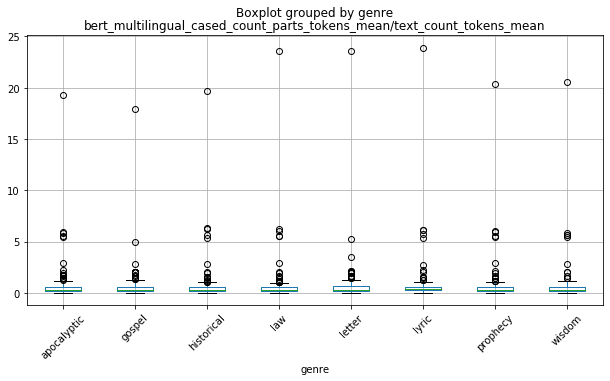

In [35]:


total_genre_df.loc[total_genre_df["bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean"] < 5]boxplot("bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean", by="genre",  figsize = [10,5], rot=45)

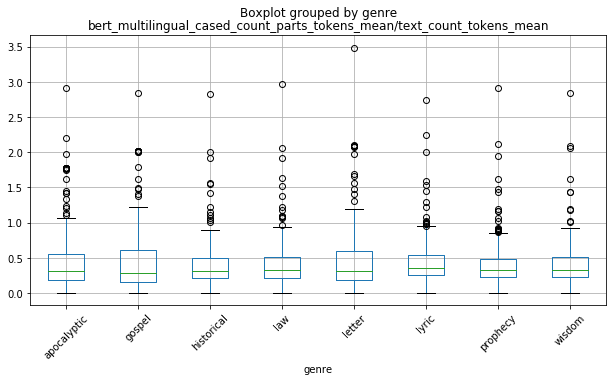

In [40]:
total_genre_df.loc[total_genre_df["bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean"] < 5].boxplot("bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean", by="genre",  figsize = [10,5], rot=45)

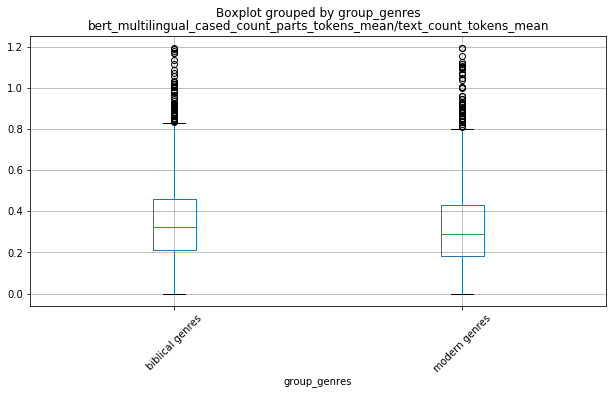

In [61]:
total_genre_df.loc[(total_genre_df["group_genres"].notna()) & (total_genre_df["bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean"] < 1.2)].boxplot("bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean", by="group_genres",  figsize = [10,5], rot=45)

In [42]:
total_genre_df.loc[total_genre_df["language"]=="ENG"].groupby("genre")["bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean"].mean().sort_values()

genre
gospel         0.128603
letter         0.153813
apocalyptic    0.161314
prophecy       0.167998
historical     0.173839
law            0.174231
wisdom         0.175975
lyric          0.198079
Name: bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean, dtype: float64

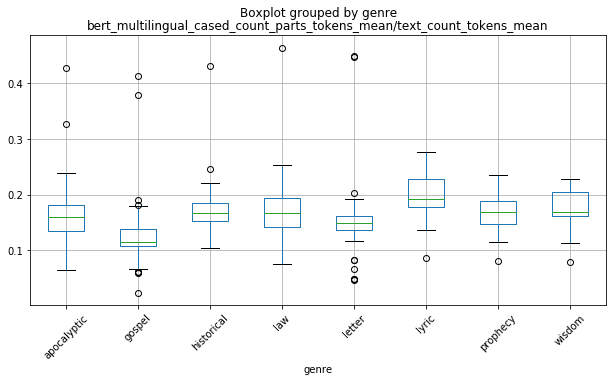

In [43]:
#total_genre_df.loc[total_genre_df["language"]=="ENG"].groupby("genre")["bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean"].mean().sort_values()

total_genre_df.loc[total_genre_df["language"]=="ENG"].boxplot("bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean", by="genre",  figsize = [10,5], rot=45)

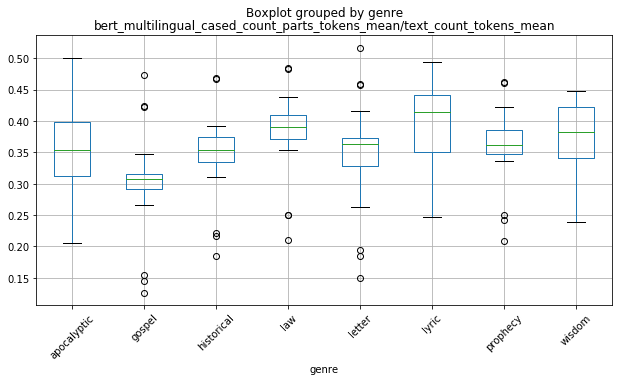

In [44]:
total_genre_df.loc[total_genre_df["language"]=="GER"].boxplot("bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean", by="genre",  figsize = [10,5], rot=45)

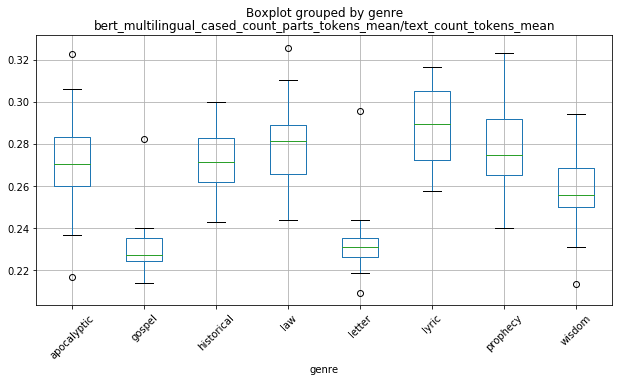

In [45]:
total_genre_df.loc[total_genre_df["language"]=="FRE"].boxplot("bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean", by="genre",  figsize = [10,5], rot=45)

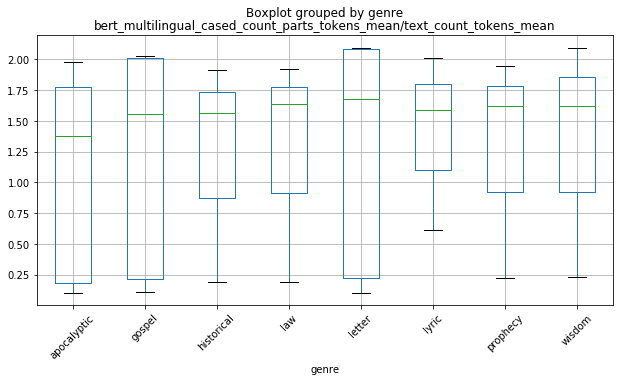

In [52]:
total_genre_df.loc[total_genre_df["language"]=="GRC"].boxplot("bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean", by="genre",  figsize = [10,5], rot=45)